# 선형 모델(Linear Models)

- 선형 모델은 100여년 전에 개발되어쏙, 지난 몇십 년 동안 폭넓게 연구되고 현재도 널리 쓰임
- 선형 모델은 입력 feature에 대한 선형 함수를 만들어 예측을 수행

### 회구의 선형 모델
 - 휘귀의 경우 선형 모델을 위한 일반적인 예측함수는 다음과 같음
 - 예측y = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b  
     * n차 함수를 나타낸 함수
 - x[0]부터 x[p]까지는 하나의 데이터 포인트데 대한 feature를 나타낸다(feature의 수는 p+1)
 - w 와 v는 모델이 학습할 파라미터 
 - 그리고 예측 y는 모델이 만들어낸 예측값
 - 만약에 특성이 하나인 데이터셋이라면 식은 다음과 같다 
     - 예측y = w[0]*x[0] + b
 - w[0]는 기울기이고 b는 y축과 만나는 절편
 - feature가 많아지면 w는 각 feature에 해당하는 기울기를 모두 가짐
 - 다르게 생각하면 예측값은 입력 feature에 w의 각 가중치(음수도 가능)을 곱해서 더한 가중치 합으로 볼 수 있음
 

* y = ax+b 에서 a는 y의 증가량과 같다

w[0]: 0.393906  b: -0.031804


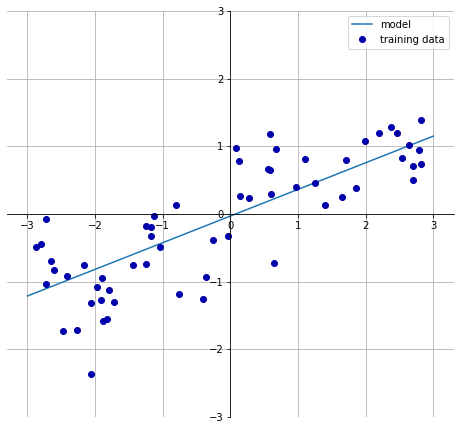

In [2]:
import mglearn
import matplotlib.pyplot as plt
mglearn.plots.plot_linear_regression_wave()
plt.show()

- 회귀를 위한 모델은 feature가 하나일 때는 직선, 두 개일 땐 평면이 되며, 더 높은 차원에서는 초평면(hyperplane)이 되는 회귀 모델의 특징을 가짐
- 이 직선과 KNeighborsRegression을 사용하여 만든 이전 그림의 선과 비교해 보면 직선을 사용한 예측이 더 제약이 많아 보임
- 즉 데이터의 상세 정보를 모두 잃어버린 것처럼 보임(어느 정도 사실)
- target y가 feature들의 선형 조합이라는 것은 매우 과한(때론 비현실적인) 가정임 
- 하지만 1차원 데이터셋만 놓고 봐서 생긴 편견일 수 있음
- feature가 많은 데이터셋이라면 선현 모델은 매우 훌륭한 성능을 낼 수 있음
- 회귀를 위한 선형 모델은 다양하게 존재, 이 모델들은 훈련 데이터로부터 모델 파라미터 w와 b를 학습하는 방법과 모델의 복잡도를 제어하는 방법에서 차이가 남 

# 선형 회귀 ( 최소 제곱법) : Ordinary least squares

- 선형 회귀(linear regression) 또는 최소제곱법(ordinary least wquares) 은 가장 간단하고 오래된 회귀용 선형 알고리즘
- 선형 회귀는 예측과 훈련 세트에 있는 target y사이의 평균제곱오차(mean squared error)를 최소화하는 파라미터 w와 b를 찾음
- 평균제곱오차는 예측값과 target값의 차이를 제곱하여 더한 후에 샘플의 수로 나눈 것
- 최소제곱법은 추가 매개변수가 없는 것이 장점이지만, 모델의 복잡도를 제어할 방법도 없음

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=50)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

- 기울기 파라미터 w는 가중치(weight) 또는 계수(coefficient) 라고 하며, lr 객체의 coef_ 속성에 저장되어 있고 , 편향(bias) 또는 절편(intercept) 파라미터 b는  intercept_ 속성에 저장되어 있음


In [4]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.40640007]
lr.intercept_: -0.014705169783905986


- intercept_ 속성은 항상 실수값 하나지만, coef_ 속성은 각 입력 feature에 하나씩 대응되는 Numpy 배열임
- wave 데이터셋에는 입력 feature가 하나뿐이므로 lr.coef_ 도 원소를 하나만 가지고 있음

In [5]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.60
Test set score: 0.57


- 하지만 훈션 세트와 테스트 세트의 점수가 매우 비슷, 즉 과대적합이 아니라 과소 적합인 상태를 의미
- 1차원 데이터셋에서는 모델이 매우 단순하므로 과대적합을 걱정할 필요가 없음
- 그러나 feature가 많은 고차원 데이터셋에서는 선형 모델의 성능이 매우 높아져서 과대적합될 가능성이 높음
 * 두 값이 비슷 하고, 둘 다 낮은 값은 가진다

In [6]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [7]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


 - 훈련용 테스트 정확성은 높으나, 테스트 정확도가 떨어짐.
 - 전형적인 과대적합 예시
 - feature 가 너무 많아져서 생긴 문제

## Ridge Regression
 - 리지도 회귀를 위한 선형 모델이므로 최소 제곱법에서 사용한 것고 ㅏ같은 예측 함수를 사용
  - 하지만 리치 회귀에서는 가중치 w 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있음
  - 가중치의 절대값을 가능한 한 작게 만드는 것. 즉 w의 모든 원소가 0에 가깝게 되길 원함
 * 절대값이 커지면 과대적함으로 가므로 이를 막기 위해 최대한 작게 만드는 것 
 - 이런 제약을 규체(Regularization )이라 함
 - 규제란 최대한 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미
 - 리지 회귀에 사용하는 규제 방식을 L2 규제라 함


In [8]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


 - 훈련 세트의 점수는 LinerTegression보다 낮지만 테스트 세트에 대한 점수는 더 높음
  - 모델의 복잡도가 낮아지면 훈련 세트의 성능은 나빠지지만 더 일반화된 모델이 
 - Ridge는 모델을 단순하게 해주고 훈련 세트에 대한 성능 사이를 절충할 수 있는 방법을 제공함
 - 앞의 예제에서는 기본값인 alpha=1.0 을 사용
     - 규제를 강하게 할 것이냐 약하게 할 것이냐를 정할 수 있다는 의미
 - alpha 값을 높이면 (규제를 더 강하게) 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에 도움을 줌
      - 규제를 약하게 하면 보델이 복잡 - > 오버피팅이 될 확률 이 높다 

In [9]:
# alph 값을 높이면 훈련/테스트 값이 낮이지는 것을 볼 수 있다 
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [10]:
# alph 값을 낮추면 훈련/테스트 값이 높아지는 것을 볼 수 있다 
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


 - 이 코드에서는 alpha=0.1일 때 꽤 좋은 성능을 보임
 - 테스트 세트에 대한 성능이 높아질 때까지 alpha값을 줄일 수 있다. 
 * 어떤 alpha값이 가장 이상적일 지는 정해진 것이 없이, 샘플마다, 데이터의 종류마다 다르기 때문에 그때그떄 적용하며 가장 좋은 값을 찾아야 한다
 - 높은 alph 값은 제약이 더 많은 모델이므로 작은 alpha 값일 때보다 coef_의 절대값 크기가 작을 것이라고 예상할 수 있음.

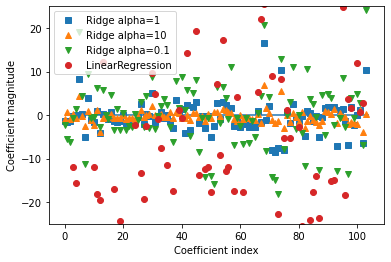

In [11]:
import matplotlib.pyplot as plt

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

 - x 축은 coef_ 의 원소를 위치대로 나열, y축은 각 계수의 수치


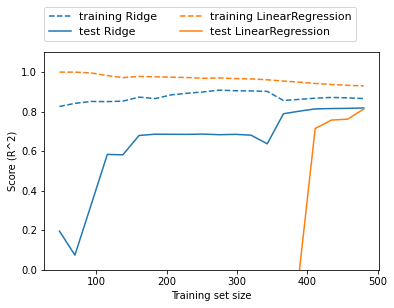

In [13]:
mglearn.plots.plot_ridge_n_samples()
plt.show()

 - 보스턴 주택가격 데이터셋에서 여러 가지 크기로 샘플링하여 LinearRegression과 Ridge(alph=1)을 적용한 것임
 - 이렇게 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프를 학습 곡선(Learning curve)라고 함
 - 리지는 규제가 적용되므로 선형 회귀보다는 전바적으로 훈련 데이턱 점수가 낮음
 - 그러나 테스트 데이터에서는 리지의 점수가 더 높음
 - 두 모델 저눕 데이터가 많아질 수록 성능이 향상됨
 - 데이터가 많아질수록 선형회귀의 모델은 데이터를 기억하거나 과대적학하기 어려워짐을 보임

### 라소(Lasso)
 - 리지 회귀에서와 같이 라소도 계수를 0에 가깝게 만들려고 함
 - L1 규제를 사용함. 실제 특정 계수는 0이 됨. 즉 모델에서 완전히 제외되는 feature가 생김
 - 일종의 feature selection 이 자동으로 이루어짐
 - 일부 계수를 0으로 만들면 모델을 이해하기 쉬워지고 이 모델의 가장 중요한 feature가 무엇인지 드러내 줌

In [17]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

Training set score: 0.29
Test set score: 0.21


In [19]:
# 천체 feature 104개 중 몇개를 사용했는지 확인
import numpy as np
print("Number of features used:", np.sum(lasso.coef_ != 0))

Number of features used: 4


In [21]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
# max_iter는 반복하는 횟수. 알파값을 줄이면 이 값을 늘려줘야 한다

print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


 - alpha 값을 낮추면 모델의 복잡도는 증가하여 훈련 세트와 테스트 세트에서의 성능이 좋아짐
 - 성능은 리지보다 비슷하거나 조금 더 좋게 나오는데 사용된 특성은 104개 중 33개 뿐이여서 아마도 모델을 분석하기 ㅏ더 쉬워짐
 - 그러나 alpha 값을 너무 줄이면 규제의 효과가 없어져 과대적합이 되므로 LinearRegression의 결과와 비슷해짐

In [22]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
# max_iter는 반복하는 횟수. 알파값을 줄이면 이 값을 늘려줘야 한다

print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


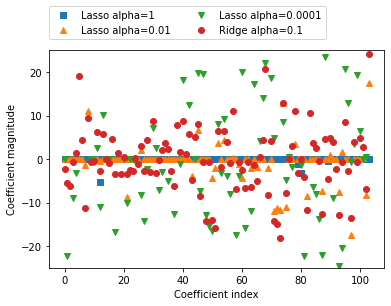

In [23]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()

- alpha=0.1 인 리지 모델은 alpha =0.01인 라소 모델과 성능이 비슷하지만 리지를 사용하면 어떤 계수도 0이 되지 않음
- 실제도 이 두 모델 중 보통은 리치 회귀를 선호함
- 하지만 feature 가 많ㅇ고 그 중 일부만 사용하므로 쉽게 해석할 수 있는 모델을 만들어 줌
- 또한 분석하기 쉬운 모델을 원한다면 라소가 입력 feature 중 일부만 사용하므로 쉽게 해석할 수 있는 모델을 만들어 줌
- scikit-learn은 라소오 ㅏ리지의 패널티를 결합한 Elasticnet도 제공함. 실제로 이 조합은 최상의 성능을 내지만 L1, L2 규제를 위한 매개변수 두 개를 조정해야 함

## 분류용 선형 모델
- 이전 분류(binary classification)의 경우 예측을 위한 방정식은 다음과 같음
- 예측y = w[0]
- feature 들의 가중치 합을 그냥 사용하는 대신 예측한 값을 임계치 0 과 비교
- 함수에서 계산한 값이 0보다 작으면 클래스를 01이라고 예측 0보다 크면 +1 이라고 예측
- 이 규칙은 분류에 쓰이는 모든 선형 모델에서 동일함
- 여기에서도 계수(w)와 절편(b)을 찾기 위한 방법이 많이 있음

- 회귀용 선형 모델에서는 출력 y가 feature의 헌셩 함수임. 즉, 직성.평면.초평면 임
- 분류용 선형 모델에서는 결정 결계가 입력의 선형 함수임. 즉(이전) 선형 분류기는 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류가 됨

### 선형 모델을 학습시키는 알고리즘은 다양한데, 다른 두 방벙으로 구분할 수 있음
- 특정 계수오 ㅏ절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
- 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지
- 알고리즘들은 훈련 세트를 잘 학습하는지 측정하는 방법이 각기 다름
- 부행하게도 수학적이고 기술적인 이유로 알고리즘들이 만드는 잘못된 분류의 수를 최소화하도록 w와 b를 조정하는 것은 불가능함
- 가장 널리 알려진 두 개의 선형 분류 알고리즘은 linear_model.LogisticRegression에 구현된 로지스틱 회귀(Logistic Regression)dhk svm.LinearSVC(Support Vector Classifier)에 구현된 선형 서포트 벡타 머신 임

/Users/jeongsarah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/Users/jeongsarah/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


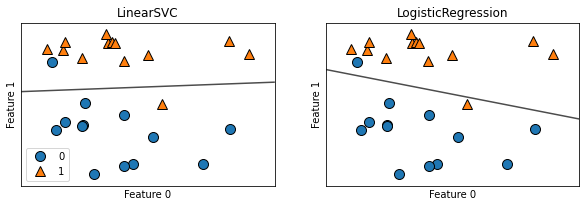

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
axes[0].legend()
plt.show()

* 세모는 클래스1, 동그라미는 클래스 0

 - 위 두 모델은 L2 규제를 사용
 - LogisticRegression 과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C
 - C의 값을 증가시키면 규제가 감소, 즉 매개변수로 높은 C값을 지정하면 LogisticRegression과 LinearSVC는 훈련 세트에 가능한 최대로 맞추려고 함
 - 반면에 C값을 낮츠면 모델은 계속 멕터(w)가 0에 가까워지도록 만듬(Ridge의 alpha값과 반대)

알파값과 c값을 매칭키셔서
오버피팅, 과소피팅 feature가 복잡하다 단순하다 등을 매치시켜서 생각

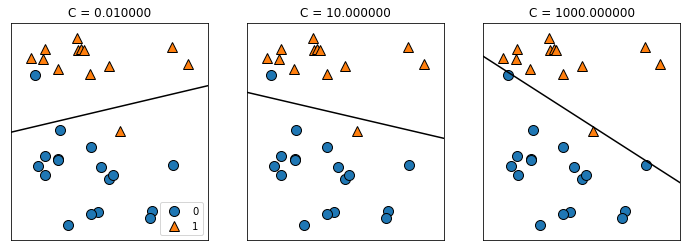

In [27]:
mglearn.plots.plot_linear_svc_regularization()
plt.show()

 - 첫 번쨰 그림은 아주 작은 C값 때문에 규제가 많이 적용되었음. 클래스 0의 대부분은 아래에 있고 클래스 1의 대부분은 위에 있음
 - 규제가 강해진 모델은 비교적 수평에 가까운 결정 경계를 만들었고, 잘못 분류한 데이터 포인트는 두 개임
 - 두 번쨰 그림은 C값이 조금 더 크며 잘못 분류한 두 샘플에 민감해져서 결정 경계가 기울어여 있음
 - 마지막 그림의 모델은 모든 데이터 포인트를 정ㄹ확하게 분류하려고 애썼지만 클래스의 전체적인 배치를 잘 파악하지 못한 것임. 즉 Overfitting
 - 그러나 고차원에서는 분류에 대한 선형 모델이 매우 강력해지며 feature가 많아지면 과대적합되지 않도록 하는 것이 매두 중요

In [33]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target, stratify=cancer.target, random_state=42)
logreg= LogisticRegression(max_iter=10000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Training set score: 0.96
Test set score: 0.96


- 기본값이 c=1이 훈련 세트와 테스트 세트 양쪽에 94% ~ 96% 정확도를 내는 훌륭한 성능
- 핮미나 훈련 세트와 테스트 세트의 성능이 매우 비슷하므로 과소 적합일 가능성이 큼

In [36]:
 규제를 약하게 했더니 정확도가 올라갔다 즉 복잡도가 높아졌다 
    이번엔 규제를 약하게

SyntaxError: invalid syntax (<ipython-input-36-0986355588d9>, line 1)

In [43]:
logreg10= LogisticRegression(C=10, max_iter=10000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(logreg10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(logreg10.score(X_test, y_test)))

Training set score: 0.97
Test set score: 0.97


In [44]:
logreg001= LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.95


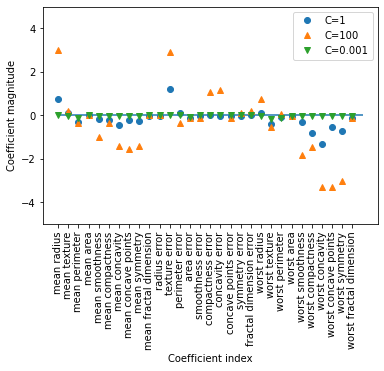

In [47]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg10.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


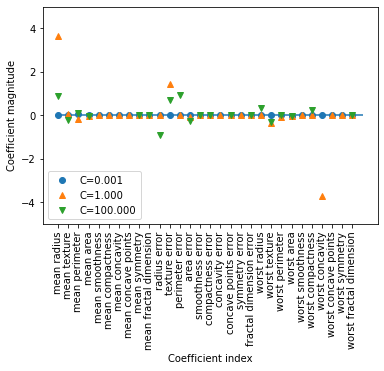

In [48]:

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

### 다중 클래스 분류용 선형 모델
- LogisticRegression 을 제외하면 많은 선형 분류 모델은 태생적으로 이전 분류만을 지원함
- 이진 분류 알고리즘 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법은 일대다(one- vs. -rest) 방법임
- 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킴
- 결국 클래스의 수만큼 이진 분류 모델이 만들어짐
- 예측을 할 떄 이렇ㄱ ㅔ만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택함
- 클래스별 이진 분류기를 만들면 각 클래스가 계수 백터(w)와 절편(b)을 하나씩 갖게 됨
- 결국 분류 신뢰도를 나타내ㅡㄴㄴ ㄴ다음 공식의 결과값이 가장 높은 클래스가 해당 데이터의 클래스 레이블로 할당됨
- w[0] × x[0] + w[1] × x[1] + … + w[p] × x[p] + b
* 클래스의 수만큼 인진분류를 만들어 내는 것

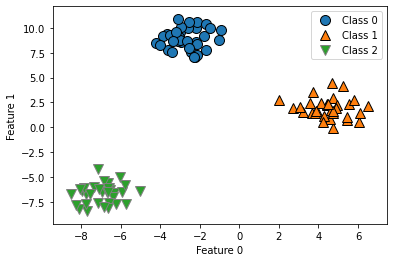

In [51]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.show()

In [53]:
linear_svm = LinearSVC().fit(X, y)

print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


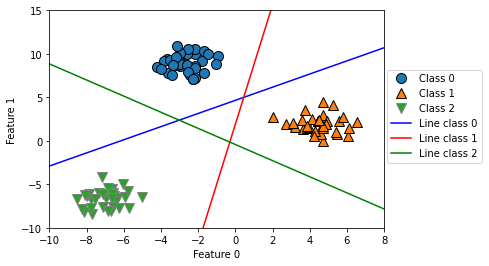

In [54]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.show()

- 클래스 0에 속한 모든 포인트는 나머지 클래스의 직선 위에 있으므로 나머지 클래스들에 의해 other로 분류됨
- 그림 중앙의 삼각형 영역은 세 분류가 모두 나머지로 분류함
- 이 곳의 데이터 포인트는 어떤 클래스로 분류되는가?
- 분류 공식으 ㅣ결과가 가장 높은 클래스로 분류됨. 즉 가장 가깡누 직선의 클래스로 됨
- 다음 예는 2차원 평면의 모든 포인트에 대한 예측 결과를 시각화 한 것임

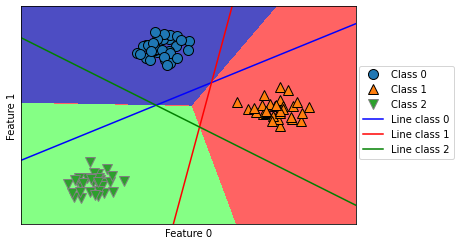

In [55]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

각 색갈로 들어오는 값들은 각 클래스로 생각한다는 의미

#### 장단점과 매개변수

- 선형 모델의 주요 매개변수는 회귀 모델에서는 alpha였고, LinearSVC 와 LogisticRegression 에서는 C임
- alpha 값일 클수록, C값이 작을수록 모델이 단순해 짐
- 보통 C와 alpha는 로그 스케일로 최적치를 정함(10배씩 변경)
- 그리고 L1규제를 사용할지 L2규제를 사용할지를 정해야 함
- 중요한 feature가 많지 않다고 생각하면 L1규제를 사용, 그렇지 않다면 기본적으로 L2규제를 사용해야 함
- 모델의 해석이 중요한 경우 L1규제는 해당 모델의 중요한 feature가 무엇이고 얼마나 영향을 미치는지 설명하기 쉬움
- 선형 모델은 학습 속도가 빠르고 예측도 빠름
- 매우 큰 데이터셋과 희소한 데이터셋에서도 잘 작동함
- 선형 모델은 샘플에 비해 feature가 많을 때 잘 동작함

# 결정 트리 (Decision Trees)'

- 결정 트리는 분류와 회귀 분제에 널리 사용하는 모델
- ㅣㄱ본적으로 결정 트리는 결정에 다다르기 위해 예/

conda/pip install graphviz

<Figure size 1000x800 with 0 Axes>

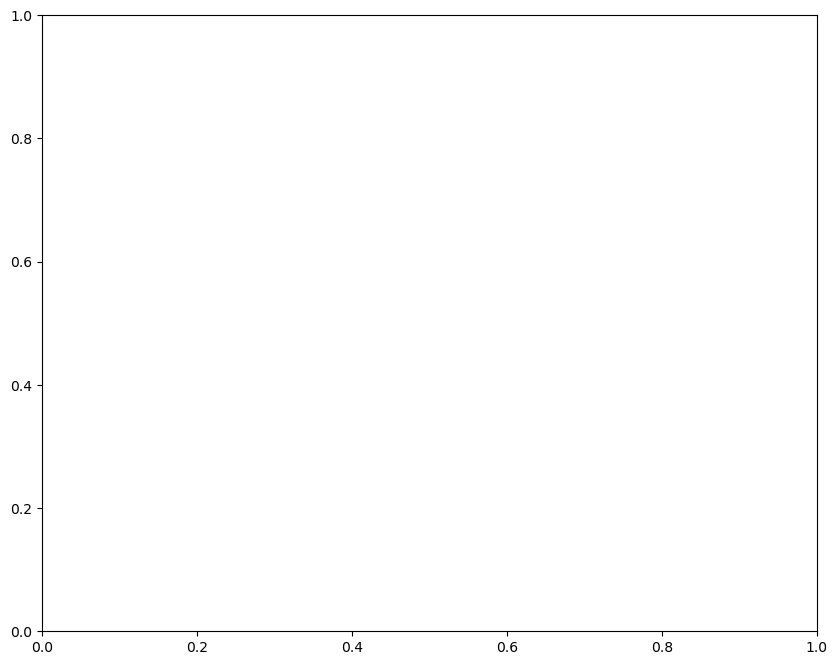

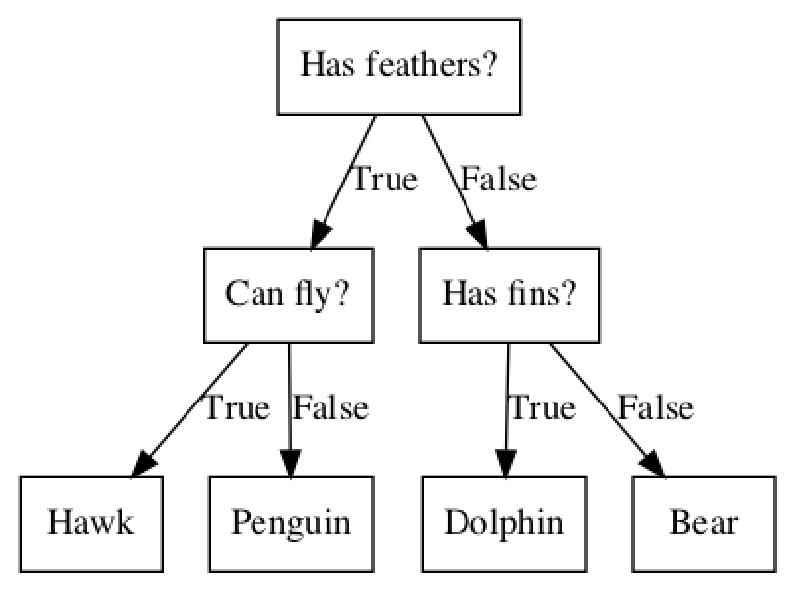

In [4]:
import mglearn
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
mglearn.plots.plot_animal_tree()
plt.show()